# Homework Six: Time Series!  
## By Max Feinglass

Populate Namespace

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt


%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


Load Data in Reproducable Manner

In [2]:
data = np.load("MTA_Fare.npy").astype(float)
data[data == -1] = float('Nan')

# Task 1

Event detection: Identify the most prominent event. There is a very significant drop (>3-sigma) in all time series.
Identify it and figure out what it is due to.

The most prominent event is almost certinally Hurricande Sandy.  Lets see...

In [3]:
# Hold the type of ride axis and the time axis constant to get a mean of the number of trips per week, per station.
# We use the mean to smooth out the line and reduce noise for visual inspection.
# Calculate STD and Mean for Z test
meanridesperstation = np.transpose(np.nanmean(data, axis = (0,1)))
riderstd = meanridesperstation.std()
ridermean = meanridesperstation.mean()

In [4]:
#Create a timeframe for our data
time = pd.date_range(('05/21/2010'), periods = 194, freq='w')

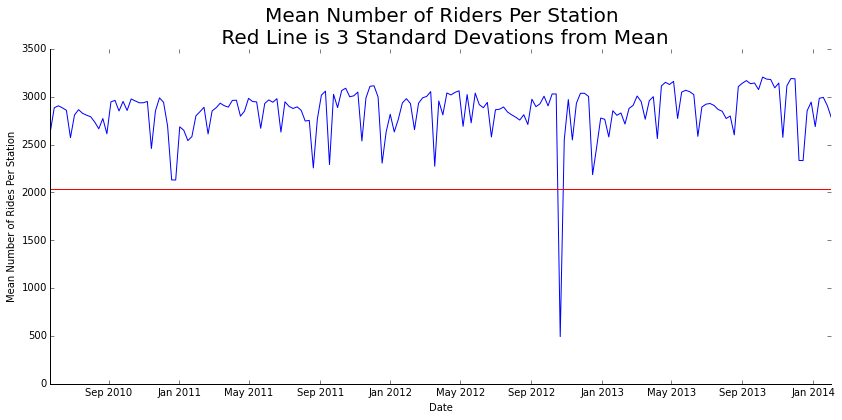

In [5]:
#Plot mean per station with 3 standard deviations
figure, ax = plt.subplots(figsize=(14,6))
ax.plot(time, meanridesperstation)
axhline( y = ridermean - (3*riderstd), color = 'r')
ax.set_ylabel('Mean Number of Rides Per Station')
ax.set_xlabel('Date')
ax.set_title('Mean Number of Riders Per Station \n Red Line is 3 Standard Devations from Mean', size =20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [6]:
minimum = np.where(meanridesperstation == meanridesperstation.min())
sandy = time[minimum[0]]
sandy = sandy[0]
print "Hurricane Sandy was at ", sandy, " which is the lowest ridership in the trend period"

Hurricane Sandy was at  2012-10-21 00:00:00  which is the lowest ridership in the trend period


Yikes!  That looks like Hurricane Sandy.  By viusual inspection, the hurricane was by far, more than 3 standard deviations, away from the rest of the data.  Therefore, one can simply find the minimum average daily trips and it turns out it is indeed Hurricane Sandy!  Look out!

## Task 2

Some of the time series are stationary, some have a complex structure, some show a downward trend: Identify the ridership types that have steadily increased in popularity, and that have steadily decreased. by how much? (e.g what is the ratio of usage in the first 10 and last 10 weeks)

Steadily is an inherently subjective catheterization of a trend.  Here, steadiness is defined by the 10 weeks at the beginning of the trend period and the ten weeks at the end of the trend period.  The mean of the total number of trips taken, segmented by rider type, was calculated from the opening window an the closing window.  Then these values divided by one another to yield their performance over the four year interval.  Any other measure, including using regression to establish a healthy line of fit, is subjective.  At some point, one has to set a threshold for what a “good” R^2 value is for example.  Therefore, the best way to decide if a fare type is increasing or decreasing to evaluate its behavior when the study began and when it ended.  

In [7]:
#hold the number of stations constant
x = np.nansum(data, axis =0)

In [8]:
#Find the opening and closing windows of means by looping thorugh all 23 types of fares and calculate a mean for each window
first10means = []
last10means = []

for i in arange(len(x)):
    first10means.append(nanmean(x[i][:10]))

for j in arange(len(x)):
    last10means.append(nanmean(x[j][-10:]))

#To compare before and adfter, simply divide the last 10 means by the first 10 means to see change over time    
performance = np.divide(last10means, first10means)



Had to use log space as the abosulte values of the riders skews the scale

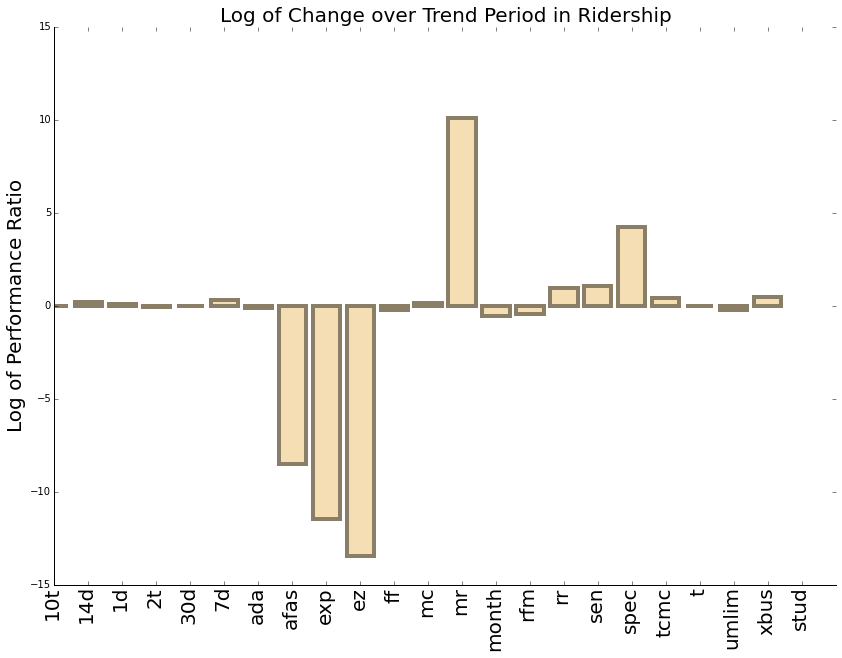

In [9]:
N = len(x)
labels1 = (['10t', '14d', '1d', '2t', '30d', '7d', 'ada', 'afas', 'exp','ez',
            'ff','mc','mr','month','rfm','rr','sen','spec','tcmc','t',
            'umlim','xbus','stud'])
fig, ax = plt.subplots(figsize=(14, 10))
width = 0.8; 
tickLocations = np.arange(N)
rectLocations = tickLocations-(width/2.0)
ax.bar(rectLocations, log(performance), width, color='wheat', edgecolor='#8B7E66', linewidth=4.0)
ax.set_xlim(0,23)
plt.xticks(tickLocations, labels1, rotation = 'vertical', size = 20)
ax.set_ylabel('Log of Performance Ratio', size = 20)
ax.set_title('Log of Change over Trend Period in Ridership', size = 20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


Task 3:
Several stations show a prominent annual periodicity. Identify the 4 stations (indentify them by the index of their location in the data cube) that show the most prominent periodic trend on an annual period (52 weeks). (Can you figure out what the periodic peak in rides is due to?)

Get the data from the cube so that we are looking at each station's riders over time

In [10]:
# columns are weeks
#rows are subwaystations
y = (np.nansum(data, axis =1))
shape(y)

(600L, 194L)

Loop through every station and perform the Fourier Transform and drop the first two observations.  Then find the values at the 52 week mark to check for annual periodicity.  Find the top four values at that 52 week period to decide which have the strongest periodicity signals.  

In [11]:
top4stations = []

for i in range(len(y)):
    # Fourier Transform
    f = np.abs(np.fft.rfft(y[i]))[2:]
    
    # Check if there is a strong period at ~52 weeks
    if f[2] > (np.mean(f) + 7.5*np.std(f)):
        top4stations.append(i)

print "The top four stations are: ", top4stations

The top four stations are:  [0, 150, 194, 311]


They all occur in the summer, indicating some tourism related connection.